In [ ]:
!pip install gdown

## Download Dataset

In [ ]:
!gdown --fuzzy 'https://drive.google.com/file/d/1IivDlJDe7omb_06vyLviGDCafNUkgBfG/view?usp=sharing'

Downloading...
From (original): https://drive.google.com/uc?id=1IivDlJDe7omb_06vyLviGDCafNUkgBfG
From (redirected): https://drive.google.com/uc?id=1IivDlJDe7omb_06vyLviGDCafNUkgBfG&confirm=t&uuid=c90fda15-8f73-467c-8b4b-7443685d2b53
To: /content/10 Burung Langka Indonesia.zip
100% 228M/228M [00:02<00:00, 81.1MB/s]


In [ ]:
import zipfile

zip_file_path = '10 Burung Langka Indonesia.zip'
extract_to = 'dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")

Extraction complete.


## Download Model

In [ ]:
!gdown --fuzzy 'https://drive.google.com/file/d/1JSxPd4Ayv2alKyc2UK5P53x_FmJZbgF3/view?usp=sharing'

Downloading...
From (original): https://drive.google.com/uc?id=1JSxPd4Ayv2alKyc2UK5P53x_FmJZbgF3
From (redirected): https://drive.google.com/uc?id=1JSxPd4Ayv2alKyc2UK5P53x_FmJZbgF3&confirm=t&uuid=b439bd78-aa6a-41bd-8c31-67aaea25f786
To: /content/model.tflite
100% 1.10G/1.10G [00:13<00:00, 84.3MB/s]


## Test the Model

Saving 035_jpg.rf.253af949288176598c7c97423455fbc2.jpg to 035_jpg.rf.253af949288176598c7c97423455fbc2.jpg
035_jpg.rf.253af949288176598c7c97423455fbc2.jpg
Predictions: [[3.8275345e-14 1.6286743e-11 1.3748322e-13 1.8069228e-11 1.0000000e+00
  1.2569808e-10 5.9148116e-12 3.0818213e-11 3.2026424e-12 4.7133885e-12]]
This image belongs to class: BURUNG KUAU KERDIL KALIMANTAN


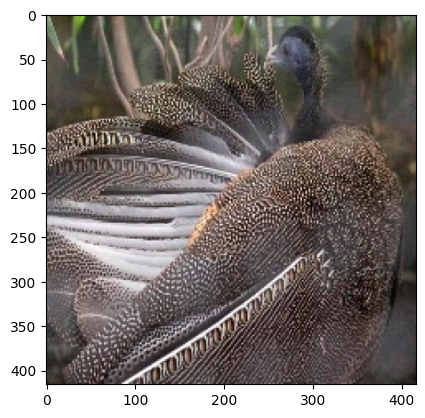

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import tensorflow as tf

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Ensure the class list is in the same order as during training
class_list = sorted(os.listdir('dataset/Burung Rare/train'))

# Upload the image files
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess the image
    path = fn
    img = Image.open(path).resize((416, 416))  # Adjust target size
    imgplot = plt.imshow(img)
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image (if your model expects normalized input)

    # Perform inference with TFLite interpreter
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Convert input data to FLOAT32
    x = x.astype(np.float32)

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], x)
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_details[0]['index'])

    print(fn)

    # Debugging information
    print("Predictions:", predictions)

    # Find the index of the maximum value in the predictions
    predicted_class_index = np.argmax(predictions[0])

    # Print the predicted class
    if predicted_class_index < len(class_list):
        predicted_class = class_list[predicted_class_index]
        print(f'This image belongs to class: {predicted_class}')
    else:
        print(f'Predicted class index is out of bounds: {predicted_class_index}')